## DS 3001 - Project 2: Predicting Likelihood of Stroke 
### Divya Kuruvilla and Glory Gurrola
This project is about building algorithmic models that predict the likelihood a person has a stroke.
The strategy to determine the best predictive model was to start by preparing and cleaning the variables in the data set. The number of missing values in each column was found, and the columns that were not relevant to data analysis were removed. Then, graphs and visualizations was created to analyze each of the variables and their, possible, relationships with the other variables. Finally, the different models were built. The models we built were linear models, a model using k nearest neighbor, and a model using classification decision trees. To determine how effective each model was, we calculated the R^2 and RMSE value for each model. Additionally, residual plots and a plot of the True Values vs. the Predicted Values were created for each model. By finding the metrics and making plots, our strategy allowed us to interpret each model and determine which model was the best one. The model with the lowest RMSE on the testing data was said to be a good model, as a low RMSE value indicates the model fits the data well. Thus, the model with the lowest RMSE value will be the final model.  

### Reading in the Data

In [361]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the Training and Testing Data 
test_df = pd.read_csv('./data/testing_data.csv')
train_df = pd.read_csv('./data/training_data.csv')

### Variables
The data included for this project contained 12 variables, and their respective descriptions are as follows: 

- age: Patient age, numeric
- avg_glucose_level: Blood sugar levels, numeric
- bmi: Body mass index, numeric
- ever_married: Ever married, dummy/character (Yes, No)
- gender: Male, Female, or Other, character
- heart_disease: Has heart disease, dummy
- hypertension: Has hypertension, dummy
- id: Study identification number
- Residence_type: Type of residence, dummy/character (Urban, Rural)
- smoking_status: Former, never, or current smoker, categorical
- work_type: Employment type (Never worked (Never_worked), homemaker ("children"), - Public sector employment (Govt_job), Private sector employment (Private), - Self-employed (Self-employed) )
- stroke: Suffered a stroke in the sample period

In [362]:
# Look at the Data 
test_df.head()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,251,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,252,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
2,253,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
3,255,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
4,259,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


From the output of "test_df.head()", some observations on how to clean the data were made. Since the variable "id" was the identification number, this variable, along with "Unnamed: 0" can be dropped. For sake of having the variables presented in an uniform manner, the "Residence_type" variable was renamed to be in lowercase to match the other variables. 

In [363]:
# Clean Data as noted above 

# Drop "id" and "Unnamed: 0" columns
test_df = test_df.drop(columns=['id', 'Unnamed: 0'])
train_df = train_df.drop(columns=['id', 'Unnamed: 0'])

# Rename "Residence_type" to be "residence_type"
test_df = test_df.rename(columns={'Residence_type':'residence_type'})
train_df = train_df.rename(columns={'Residence_type':'residence_type'})

In [364]:
# Look at the Data again after First Round of Cleaning
test_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
2,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
3,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
4,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [365]:
# Look for Missing Values
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()
print(missing_train)
print(missing_test)

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  159
smoking_status         0
stroke                 0
dtype: int64
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
residence_type        0
avg_glucose_level     0
bmi                  42
smoking_status        0
stroke                0
dtype: int64


When checking for missing values, it was observed that the only missing values were found in the "bmi" variable. To resolve this issue, the NaN values can be imputed with the mean. It might not be the best decision to drop or discard the missing values because that could lead to loss of variable data that might be useful in the future. Imputing the mean for the missing values helps maintain the size of the dataset. and can help reduce bias (that could be introduced by missing values) if the missing data is randomly distriubted. 

In [366]:
# Handle the NaN for "bmi" as noted above by imputing the mean 
train_df['bmi'] = train_df['bmi'].fillna(train_df['bmi'].mean())
test_df['bmi'] = test_df['bmi'].fillna(test_df['bmi'].mean())

In [367]:
# Do a Final Check and look for Missing Values
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()
print(missing_train)
print(missing_test)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [368]:
test_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
2,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
3,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
4,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


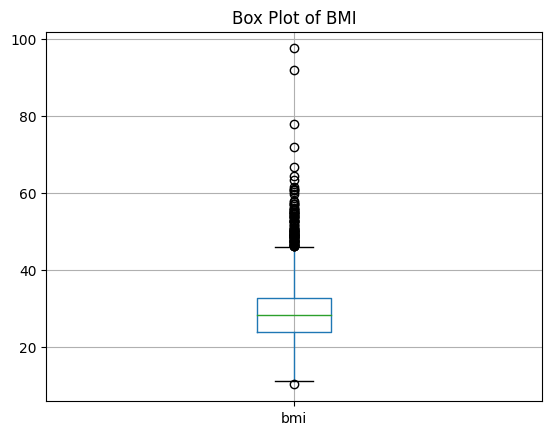

In [369]:
import matplotlib.pyplot as plt
train_df.boxplot(column='bmi')
plt.title('Box Plot of BMI')
plt.show()

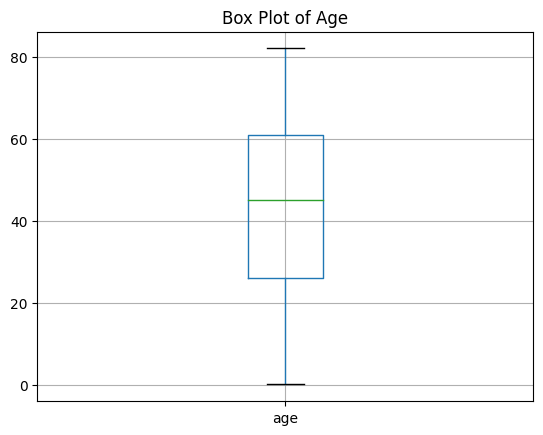

In [370]:
train_df.boxplot(column='age')
plt.title('Box Plot of Age')
plt.show()

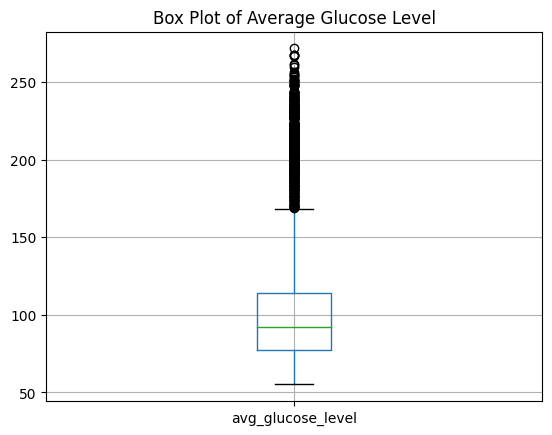

In [371]:
train_df.boxplot(column='avg_glucose_level')
plt.title('Box Plot of Average Glucose Level')
plt.show()

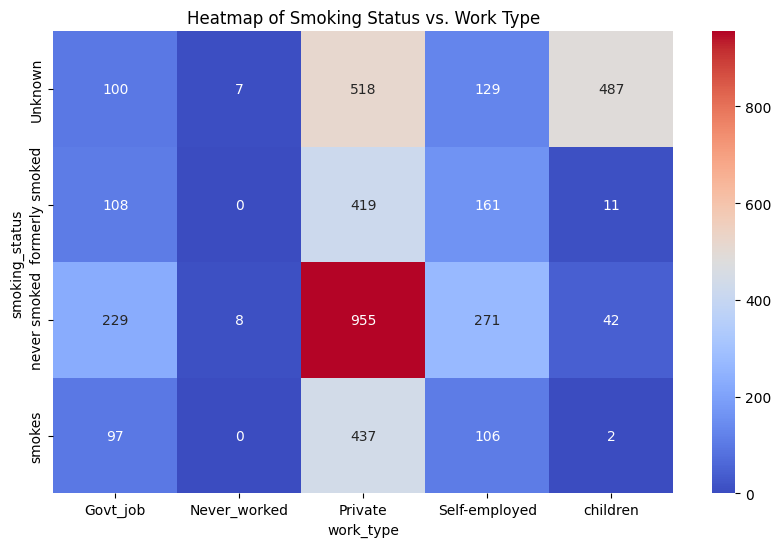

In [372]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'train_df'
# Example data creation (replace this with your actual data loading)
# train_df = pd.read_csv('your_file.csv')

# Create a cross-tabulation (contingency table) between 'smoking_status' and 'work_type'
cross_tab = pd.crosstab(train_df['smoking_status'], train_df['work_type'])

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')

# Adding a title to the heatmap
plt.title('Heatmap of Smoking Status vs. Work Type')

# Show the plot
plt.show()

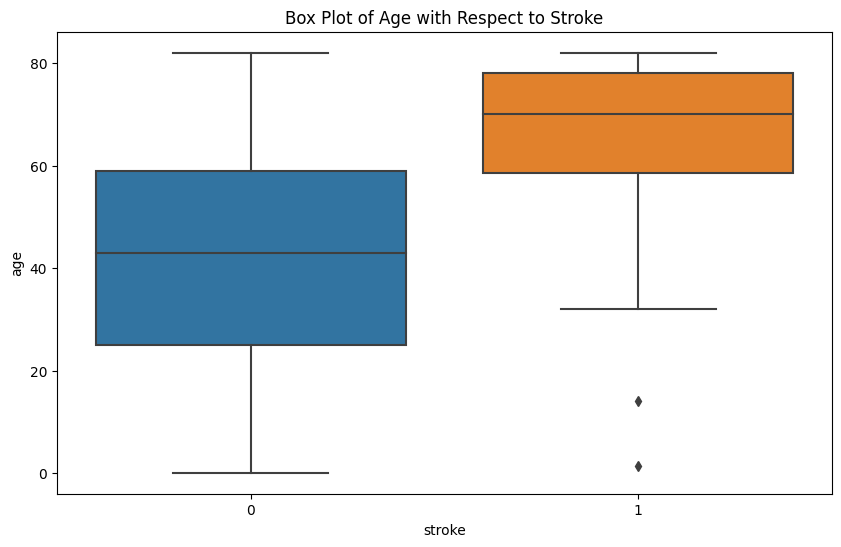

In [373]:
import seaborn as sns
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.boxplot(x='stroke', y='age', data=train_df)
plt.title('Box Plot of Age with Respect to Stroke')
plt.show()

# Shows that the average age of those who have experienced a stroke is much higher 

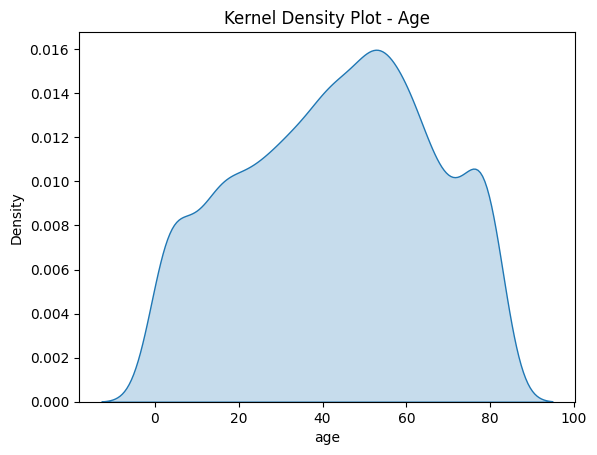

In [374]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for age
sns.kdeplot(train_df['age'], fill=True)
plt.title('Kernel Density Plot - Age')
plt.show()

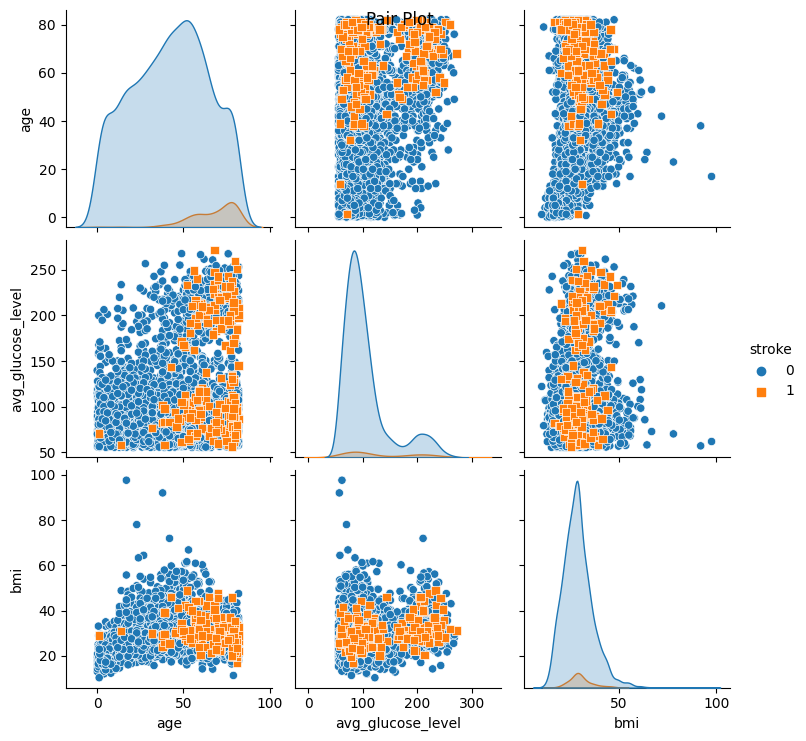

In [375]:
sns.pairplot(train_df[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke', markers=["o", "s"])
plt.suptitle('Pair Plot')
plt.show()

### Dealing with outliers

In [376]:
def windsorize(x):
    # Compute IQR and 1st, 3rd quantiles
    pct25, pct75 = np.percentile(x, [25, 75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr * 1.5
    upper_whisker = pct75 + iqr * 1.5
    # Windsorize x:
    x_windsor = x.copy()
    x_windsor.loc[x_windsor < lower_whisker] = lower_whisker
    x_windsor.loc[x_windsor > upper_whisker] = upper_whisker
    return x_windsor


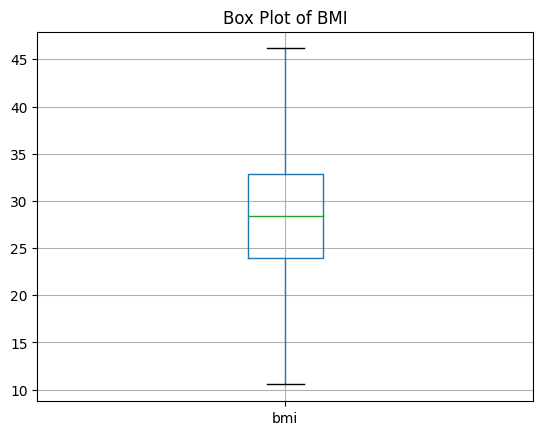

In [377]:
train_df['bmi'] = windsorize(train_df['bmi'])
train_df.boxplot(column='bmi')
plt.title('Box Plot of BMI')
plt.show()

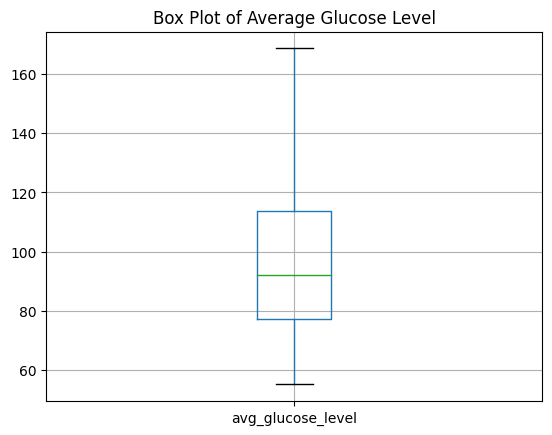

In [378]:
train_df['avg_glucose_level'] = windsorize(train_df['avg_glucose_level'])
train_df.boxplot(column='avg_glucose_level')
plt.title('Box Plot of Average Glucose Level')
plt.show()

There are no missing values, all the variables are uniform (in terms of being in lowercase letters), and the columns that were not needed were dropped. Now, the testing and training data frames can be used to make the predictive models.

### Splitting the Data 
The training and testing data can now be split into X and y data sets. Since the goal is to predict the likelihood a person has a stroke, the "stroke" variable is the target variable.

In [379]:
y_train = train_df['stroke']
y_test = test_df['stroke']
X_train = train_df.drop(columns='stroke', axis=1)
X_test = test_df.drop(columns='stroke', axis=1)

Additionally, the numeric and categorical columns can be identified to make it easier when the linear models need to be created.

In [380]:
numeric = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', ]
categorical = ['ever_married', 'gender', 'residence_type', 'smoking_status', 'work_type']

### Graphs and Visualizations
- Summarize Data and Visualize with Kernel Density Plots (numeric vars) and histograms (categorical vars)
- Address Outliers
- Explain quantitative features of data

### Linear Model - Numeric
One predictive model that can be built is where the target variable, "stroke", is regressed on the numeric variables alone. 

In [381]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# First Model - regress stroke on numeric variables alone

X_train_num = X_train[numeric]
X_test_num = X_test[numeric]

# Create and Fit the Model
model_numeric = LinearRegression()
model_numeric.fit(X_train_num, y_train)

# Predict on Test Set
y_pred_num = model_numeric.predict(X_test_num)

# Calculate and Print
r2_numeric = r2_score(y_test, y_pred_num)
rmse_numeric = mean_squared_error(y_test, y_pred_num, squared=False)
print("The Numeric Linear Model R^2 is: ", r2_numeric)
print("The Numeric Linear Model RMSE is: ", rmse_numeric)

The Numeric Linear Model R^2 is:  0.07335875107423073
The Numeric Linear Model RMSE is:  0.2075494576848589


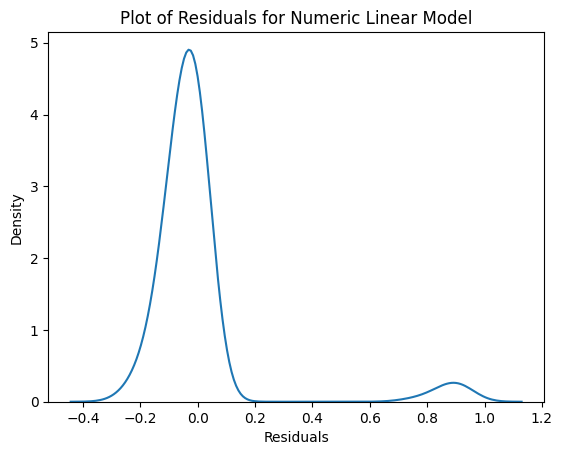

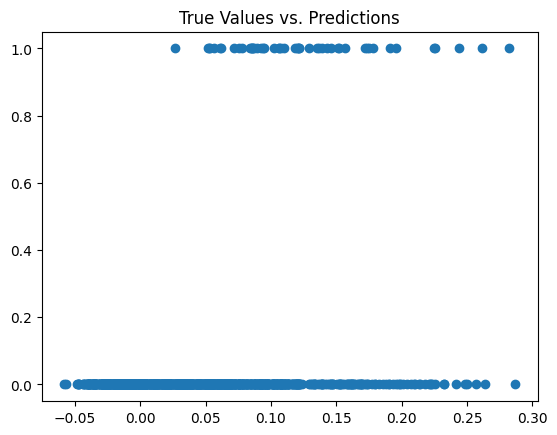

In [382]:
# Find Residuals
residuals = y_test - y_pred_num

# Residual Plot
sns.kdeplot(residuals)
plt.title('Plot of Residuals for Numeric Linear Model')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# Predicted vs. Actual Values Plot
plt.scatter(x=y_pred_num,y=y_test)
plt.title('True Values vs. Predictions')
plt.show()

From the linear model provided in the Lab 2 writeup, our linear model, that regressed on numeric columns, had a higher RMSE value. We will keep trying to determine if we get a better model. 

### Linear Model - Categorical
Next, we will build another linear model where the target variable, "stroke", is regressed on the categorical variables alone. To do this, the categorical columns (for the training and testing data sets) need to be one-hot encoded. 

In [383]:
from sklearn.preprocessing import OneHotEncoder

# Second Model - make a model comprised of one-hot encoded regressors/features alone,
# and regress stroke on those variables

# Create the Encoder object
encoder = OneHotEncoder(sparse_output=False)

# One-hot encode the categorical variables in the training set
X_train_cat = encoder.fit_transform(X_train[categorical])
encoded_names = encoder.get_feature_names_out()
# Create a new, expanded dataframe
X_train_lm = pd.DataFrame(data=X_train_cat, columns = encoded_names) 

# One-hot encode the categorical variables in the testing set
X_test_cat = encoder.transform(X_test[categorical])
encoded_names = encoder.get_feature_names_out()
# Create a new, expanded dataframe
X_test_lm = pd.DataFrame(data=X_test_cat, columns = encoded_names) 

# Create and Fit the Model
model_cat = LinearRegression()
model_cat.fit(X_train_lm, y_train)

# Predict on the Test Set
y_pred_cat = model_cat.predict(X_test_lm)

# Calculate and Print
r2_cat = r2_score(y_test, y_pred_cat)
rmse_cat = mean_squared_error(y_test, y_pred_cat, squared=False)
print("The Categorical Linear Model R^2 is: ", r2_cat)
print("The Categorical Linear Model RMSE is: ", rmse_cat)

The Categorical Linear Model R^2 is:  0.02518833095221218
The Categorical Linear Model RMSE is:  0.21287572900407561


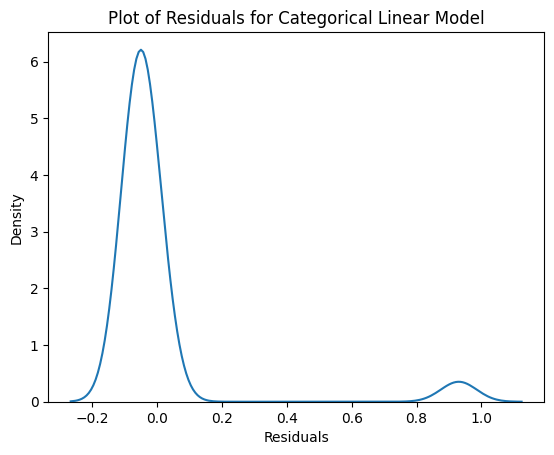

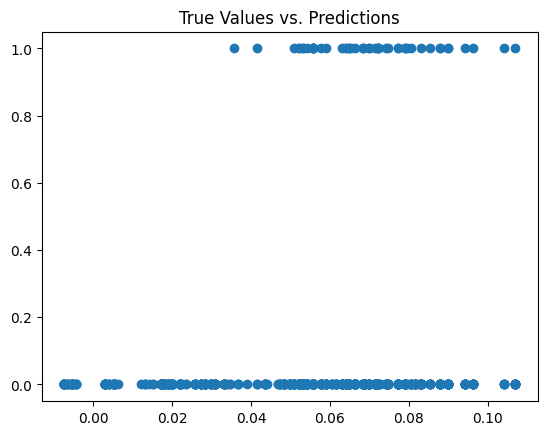

In [384]:
# Find Residuals
residuals = y_test - y_pred_cat

# Residual Plot
sns.kdeplot(residuals)
plt.title('Plot of Residuals for Categorical Linear Model')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# Predicted vs. Actual Values Plot
plt.scatter(x=y_pred_cat,y=y_test)
plt.title('True Values vs. Predictions')
plt.show()

The categorical linear model did not perform significantly better than the numeric linear model. The RMSE value is still relatively low. 
We will try to build one more linear model, a combined model of numeric and categorical columns, and then we will try other models. Hopefully, having a combined model with all the numeric and categorical columns will perform better.

### Linear Model - Combined Model (Numeric and Categorical Columns)

In [385]:
# Third Model - Numeric and Categorical

# Combine numeric features with encoded categorical features, with pd.concat
X_train_combined = pd.concat([X_train_num.reset_index(drop=True),
                              pd.DataFrame(X_train_cat , columns=encoded_names)], axis=1)
X_test_combined = pd.concat([X_test_num.reset_index(drop=True),
                             pd.DataFrame(X_test_cat , columns=encoded_names)], axis=1)

# Create and Fit model
model_combined = LinearRegression()
model_combined.fit(X_train_combined, y_train)

# Predict on the Test Set
# Calculate and Print
y_pred_combined = model_combined.predict(X_test_combined)
r2_combined = r2_score(y_test, y_pred_combined)
rmse_combined = mean_squared_error(y_test, y_pred_combined, squared=False)
print("The Combined Linear Model R^2 is: ", r2_combined)
print("The Combined Linear Model RMSE is: ", rmse_combined)

The Combined Linear Model R^2 is:  0.08085642940764215
The Combined Linear Model RMSE is:  0.20670808587693615


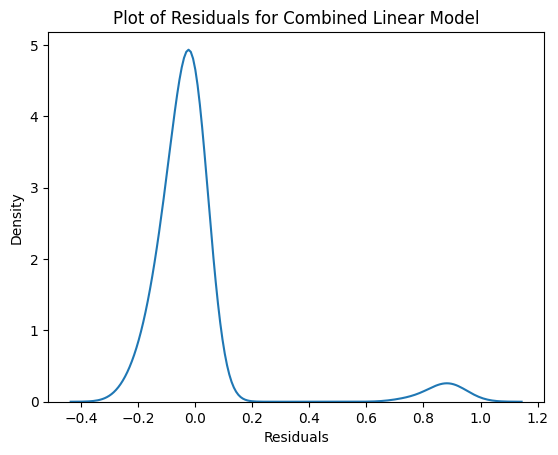

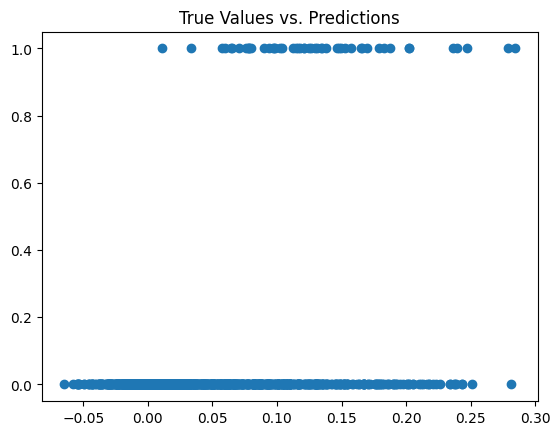

In [386]:
# Find Residuals
residuals = y_test - y_pred_combined

# Residual Plot
sns.kdeplot(residuals)
plt.title('Plot of Residuals for Combined Linear Model')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# Predicted vs. Actual Values Plot
plt.scatter(x=y_pred_combined,y=y_test)
plt.title('True Values vs. Predictions')
plt.show()

Even with the combined linear model (with numeric and categorical columns), the RMSE value is still in the same range as the numeric linear model and categorical linear model. Although, the RMSE value of the combined linear model was the lowest of all three linear models, the difference is not significant enough to conclude that a linear model is the best predictive model to determine the likelihood a person will have a stroke. Therefore, instead of building a linear model using polynomial degree expansion, we will move onto other methods, such as building a model using KNN and classification decision trees, to determine if those models are better at predicting than linear models.

### K nearest Neighbor (KNN)
Since the linear models were not effective models, the next type of model that can be built is using KNN. 

The X_train and X_test data sets contain non-numeric columns (i.e., in the format of strings). In order to employ the maxmin normalization function, the non-numeric columns must be converted or mapped to numeric values. 

In [387]:
train_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,36.0,0,0,Yes,Govt_job,Urban,65.87,32.2,formerly smoked,0
1,Female,45.0,0,0,Yes,Govt_job,Rural,68.66,25.3,never smoked,0
2,Male,58.0,0,0,No,Self-employed,Rural,168.67,30.7,Unknown,0
3,Female,61.0,0,0,Yes,Self-employed,Urban,69.88,27.1,never smoked,0
4,Female,78.0,0,0,No,Private,Urban,103.86,30.6,Unknown,0


In [388]:
# Making all Columns Numeric
# Remember, that these are the columns that need to made numeric. 
# categorical = ['ever_married', 'gender', 'residence_type', 'smoking_status', 'work_type']

# Create a copy of the training and testing dataframes to not mess up the other linear
# models already made. 
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

# Value Mapping 'ever_married'
value_mapping_em = {
    'Yes': 1,
    'No': 0,
}
train_df_copy['ever_married'].replace(value_mapping_em, inplace=True)
test_df_copy['ever_married'].replace(value_mapping_em, inplace=True)

# Value Mapping 'gender'
value_mapping_gender = {
    'Female': 1,
    'Male': 0,
    'Other': 2
}
train_df_copy['gender'].replace(value_mapping_gender, inplace=True)
test_df_copy['gender'].replace(value_mapping_gender, inplace=True)

# Value Mapping 'residence_type'
value_mapping_res = {
    'Urban': 0,
    'Rural':1
}
train_df_copy['residence_type'].replace(value_mapping_res, inplace=True)
test_df_copy['residence_type'].replace(value_mapping_res, inplace=True)

# Value Mapping 'smoking_status'
value_mapping_smoke = {
    'Unknown': 0,
    'never smoked':1,
    'smokes': 2,
    'formerly smoked': 3
}
train_df_copy['smoking_status'].replace(value_mapping_smoke, inplace=True)
test_df_copy['smoking_status'].replace(value_mapping_smoke, inplace=True)

# Value Mapping 'work_type'
value_mapping_work = {
    'Govt_job': 0,
    'Self-employed':1,
    'Private': 2,
    'Never_worked': 3,
    'children': 4

}
train_df_copy['work_type'].replace(value_mapping_work, inplace=True)
test_df_copy['work_type'].replace(value_mapping_work, inplace=True)

In [389]:
# Look at Data after Value Mapping 
train_df_copy.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,36.0,0,0,1,0,0,65.87,32.2,3,0
1,1,45.0,0,0,1,0,1,68.66,25.3,1,0
2,0,58.0,0,0,0,1,1,168.67,30.7,0,0
3,1,61.0,0,0,1,1,0,69.88,27.1,1,0
4,1,78.0,0,0,0,2,0,103.86,30.6,0,0
5,0,34.0,0,0,0,2,0,108.47,30.4,2,0
6,1,78.0,1,1,1,2,0,168.67,41.7,1,0
7,1,37.0,0,0,1,2,1,110.28,22.3,1,0
8,0,63.0,0,0,1,2,1,168.67,35.9,1,0
9,1,37.0,0,0,1,0,0,75.98,33.8,0,0


In [390]:
# Look at Data after Value Mapping 
test_df_copy.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,58.0,1,0,1,2,0,87.96,39.2,1,0
1,1,8.0,0,0,0,2,0,110.89,17.6,0,0
2,1,70.0,0,0,1,2,1,69.04,35.9,3,0
3,1,47.0,0,0,1,2,0,210.95,50.1,0,0
4,1,74.0,1,0,1,1,0,205.84,54.6,1,0
5,1,79.0,0,0,1,0,0,77.08,35.0,0,0
6,0,79.0,0,1,1,2,0,57.08,22.0,3,0
7,1,40.0,0,0,1,2,1,95.04,42.4,1,0
8,0,35.0,0,0,0,2,1,85.37,33.0,1,0
9,1,44.0,0,0,1,0,0,57.33,24.6,2,0


In [391]:
from sklearn.neighbors import KNeighborsRegressor

# Splitting the data again with the new data frames that have all numeric columns
y_train2 = train_df_copy['stroke']
y_test2 = test_df_copy['stroke']
X_train2 = train_df_copy.drop(columns='stroke', axis=1)
X_test2 = test_df_copy.drop(columns='stroke', axis=1)
TSS = np.sum( (y_test2 - y_train2.mean())**2 )
N_test = len(y_test2)

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X:
X_train_knn = X_train2.apply(maxmin)
X_test_knn = X_test2.apply(maxmin)

# Determine optimal k:
k_bar = 50
# The range of k's to consider
k_grid = np.arange(1,k_bar) 
# For comparison purposes, store the training error
SSE = np.zeros(k_bar-1) 

for k in range(k_bar-1):
    # Create and Train the Model
    model = KNeighborsRegressor(n_neighbors=k+1) 
    fitted_model = model.fit(X_train_knn,y_train2) 

    # Predict values for test set
    y_hat = fitted_model.predict(X_test_knn) 

    # Save the computed SSE
    SSE[k] = np.sum( (y_test2-y_hat)**2 ) 

# Lowest recorded SSE
SSE_min = np.min(SSE) 
# Find the indices of y that equal the minimum
min_index = np.where(SSE==SSE_min)
# Find Optimal value of k
k_star = k_grid[min_index][0] 

# Fit optimal model
model = KNeighborsRegressor(n_neighbors=max(3,k_star))
knn_star = model.fit(X_train_knn,y_train2)
y_hat_knn = knn_star.predict(X_test_knn)
residuals_knn = y_test2 - y_hat_knn


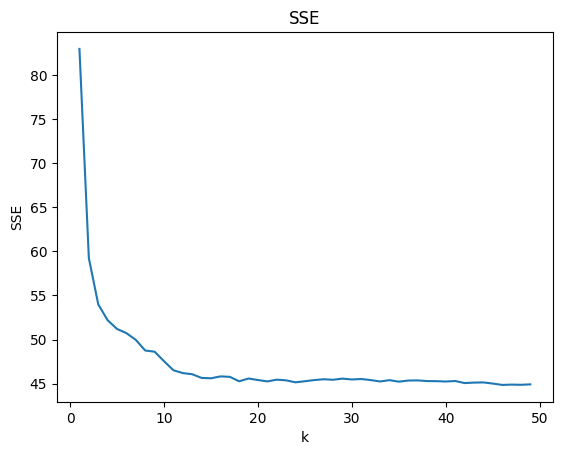

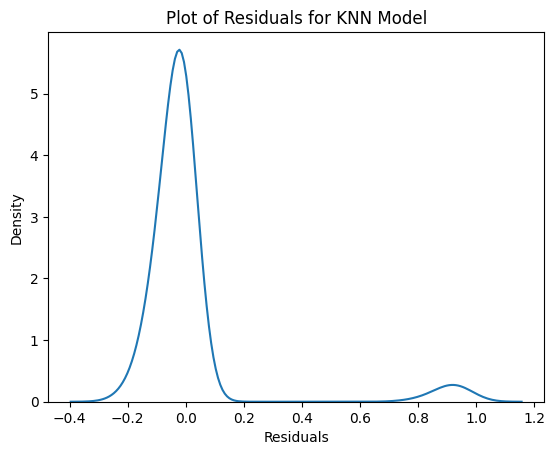

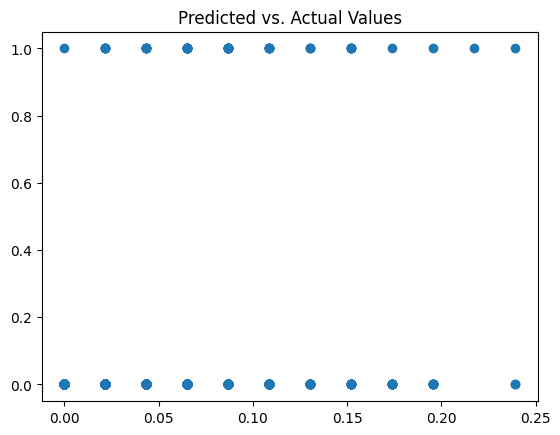

The KNN Model R^2 Value is:  0.05705122791950323
The KNN Model RMSE Value is:  0.20936785222543036


In [392]:
# SSE plot:
plt.plot(k_grid,SSE)
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('SSE')
plt.show()

## Residual plot:
sns.kdeplot(residuals_knn)
plt.title('Plot of Residuals for KNN Model')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# True versus predicted plot:
plt.scatter(x=y_hat_knn,y=y_test2)
plt.title('Predicted vs. Actual Values')
plt.show()

# Metrics:
SSE_knn = np.sum( (y_test2-y_hat_knn)**2 )
MSE_knn = SSE_knn/N_test
RMSE_knn = (SSE_knn/N_test)**(1/2)
R2_knn = 1 - SSE_knn/TSS
print("The KNN Model R^2 Value is: ", R2_knn)
print("The KNN Model RMSE Value is: ", RMSE_knn)

Even from the KNN model, the RMSE value was still in the same range as the other linear models. It does not seem that the KNN Model performed better than the other models already created. The next and final model we will try is the classification decision trees model. 

### Classification Decision Trees
The final model we will build is the classification decision trees model. 

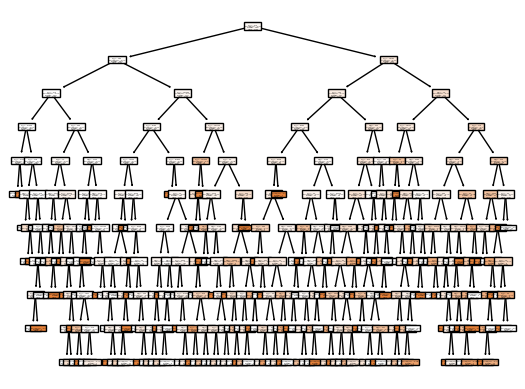

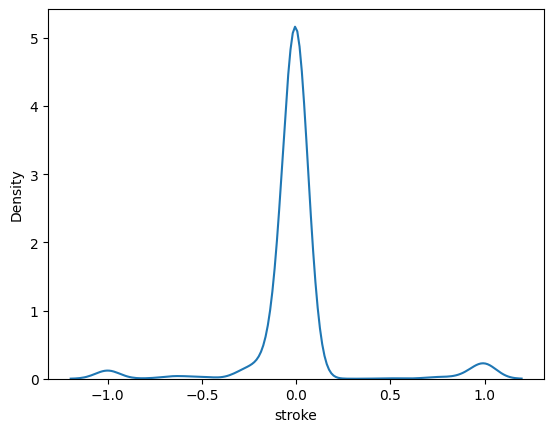

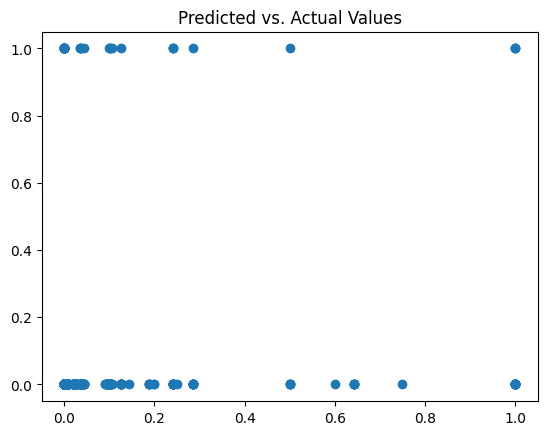

The Classification Decision Tree Model R^2 Value is:  -0.4636045403489826
The Classification Decision Tree Model RMSE Value is:  0.26084218066617587


In [393]:
from sklearn import tree

# Splitting the data again with the new data frames that have all numeric columns
y_train2 = train_df_copy['stroke']
y_test2 = test_df_copy['stroke']
X_train2 = train_df_copy.drop(columns='stroke', axis=1)
X_test2 = test_df_copy.drop(columns='stroke', axis=1)
TSS = np.sum( (y_test2 - y_train2.mean())**2 )
N_test = len(y_test2)

# Fit the classifier
model = tree.DecisionTreeRegressor(max_depth=10) 
cart = model.fit(X_train2, y_train2)
tree.plot_tree(cart,filled=True)
plt.show()

# Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test2)
residuals_cart = y_test2 - y_hat_cart

# Residual plot:
sns.kdeplot(residuals_cart)
plt.show()

# True versus predicted plot:
plt.scatter(x=y_hat_cart,y=y_test2)
plt.title('Predicted vs. Actual Values')
plt.show()


# Metrics:
SSE_cart = np.sum( (y_test2-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test2-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS
print("The Classification Decision Tree Model R^2 Value is: ", R2_cart)
print("The Classification Decision Tree Model RMSE Value is: ", RMSE_cart)

The classification decision tree model was not any better than the KNN model and linear models that were built. The RMSE value for the classification decision tree model was the highest for this model, and the R^2 value is negative, implying that the model did a poor job of fitting the data. Thus, this model can be seen as the model that did the worst.

### Analysis 
- Talk about research strategy
- Main findings (summarize tables/plots/statistics)

In [394]:
# Comparison Table - model eval notes - do RMSE and R^2
# gdf = pd.DataFrame({ 'RMSE':[RMSE_knn,RMSE_lm,RMSE_cart],
#                     'R2':[R2_knn,R2_lm,R2_cart]})
# gdf.index = ['kNN','LM','CART'] - change to put the model
# gdf.head()